In [299]:
# Python Interpreter for my system
import sys
print(sys.executable) 

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python


In [300]:
# All the dependencies
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

import seaborn as sns
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [301]:
# Dataframe as df - Path must be given relative to its location
df = pd.read_csv('diabetese_50000.csv')

In [302]:
# A glimpse of the dataframe
print(df)

       Has_diabetes  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0               1.0     1.0       0.0        1.0  30.0     1.0     0.0   
1               1.0     1.0       1.0        1.0  27.0     1.0     0.0   
2               0.0     0.0       0.0        1.0  22.0     0.0     0.0   
3               0.0     0.0       0.0        1.0  38.0     0.0     0.0   
4               0.0     0.0       0.0        1.0  32.0     0.0     0.0   
...             ...     ...       ...        ...   ...     ...     ...   
49995           1.0     1.0       1.0        1.0  33.0     0.0     0.0   
49996           0.0     1.0       1.0        1.0  27.0     1.0     0.0   
49997           0.0     1.0       1.0        1.0  26.0     0.0     0.0   
49998           0.0     0.0       0.0        1.0  27.0     0.0     0.0   
49999           0.0     0.0       0.0        1.0  24.0     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                       0.0           

In [303]:
# Information about the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Has_diabetes          50000 non-null  float64
 1   HighBP                50000 non-null  float64
 2   HighChol              50000 non-null  float64
 3   CholCheck             50000 non-null  float64
 4   BMI                   50000 non-null  float64
 5   Smoker                50000 non-null  float64
 6   Stroke                50000 non-null  float64
 7   HeartDiseaseorAttack  50000 non-null  float64
 8   PhysActivity          50000 non-null  float64
 9   Fruits                50000 non-null  float64
 10  Veggies               50000 non-null  float64
 11  HvyAlcoholConsump     50000 non-null  float64
 12  AnyHealthcare         50000 non-null  float64
 13  NoDocbcCost           50000 non-null  float64
 14  GenHlth               50000 non-null  float64
 15  MentHlth           

In [304]:
# Shape of the data - 50000 rows and 22 columns
print(df.shape)

(50000, 22)


In [305]:
# Counts all the features and their respective values and type(s)
for col in df.columns:
    print(df[col].value_counts())
    print(df[col].dtype)
    print()

Has_diabetes
0.0    25074
1.0    24926
Name: count, dtype: int64
float64

HighBP
1.0    28149
0.0    21851
Name: count, dtype: int64
float64

HighChol
1.0    26297
0.0    23703
Name: count, dtype: int64
float64

CholCheck
1.0    48758
0.0     1242
Name: count, dtype: int64
float64

BMI
27.0    4498
26.0    3487
28.0    3244
24.0    3102
30.0    3077
        ... 
12.0       1
85.0       1
86.0       1
80.0       1
98.0       1
Name: count, Length: 79, dtype: int64
float64

Smoker
0.0    26292
1.0    23708
Name: count, dtype: int64
float64

Stroke
0.0    46899
1.0     3101
Name: count, dtype: int64
float64

HeartDiseaseorAttack
0.0    42623
1.0     7377
Name: count, dtype: int64
float64

PhysActivity
1.0    35163
0.0    14837
Name: count, dtype: int64
float64

Fruits
1.0    30575
0.0    19425
Name: count, dtype: int64
float64

Veggies
1.0    39380
0.0    10620
Name: count, dtype: int64
float64

HvyAlcoholConsump
0.0    47849
1.0     2151
Name: count, dtype: int64
float64

AnyHealthcare
1

In [306]:
# Identifying numerical and categorical features by count of unique values.
# I choose 10 to be the threshold to go from categorial to numerical

cat_cols = []
num_cols = []

for col in df.columns:
    if col == 'Has_diabetes':
        continue
    if len(df[col].unique()) < 10:
        cat_cols.append(col)
    else:
        num_cols.append(col)
print("\nNumerical: ")
print(*num_cols, sep = "\n")

print("\nCategorical: ")
print(*cat_cols, sep = "\n")


Numerical: 
BMI
MentHlth
PhysHlth
Age

Categorical: 
HighBP
HighChol
CholCheck
Smoker
Stroke
HeartDiseaseorAttack
PhysActivity
Fruits
Veggies
HvyAlcoholConsump
AnyHealthcare
NoDocbcCost
GenHlth
DiffWalk
Sex
Education
Income


Generating countplot for: HighBP


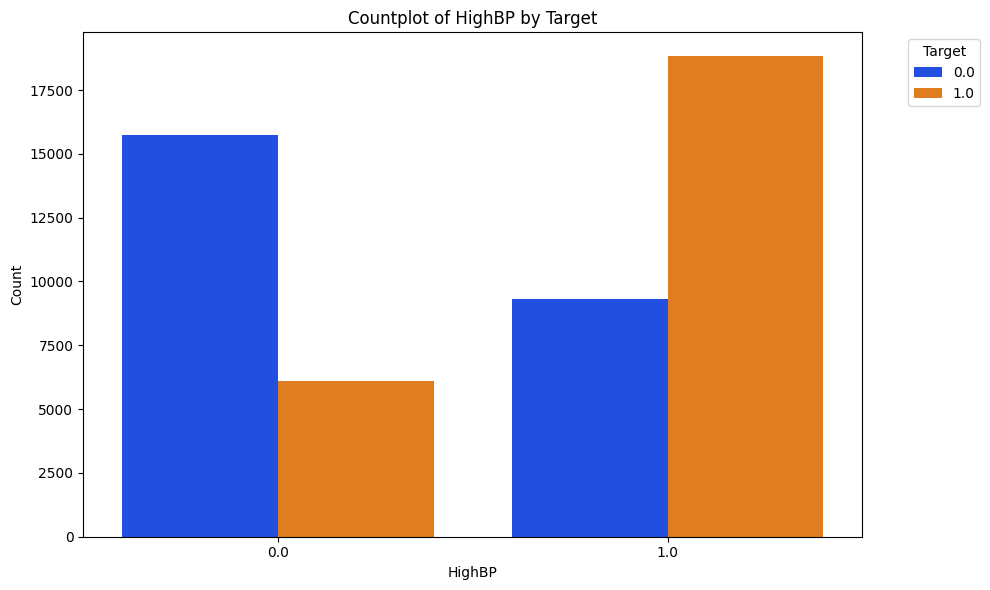

Generating countplot for: HighChol


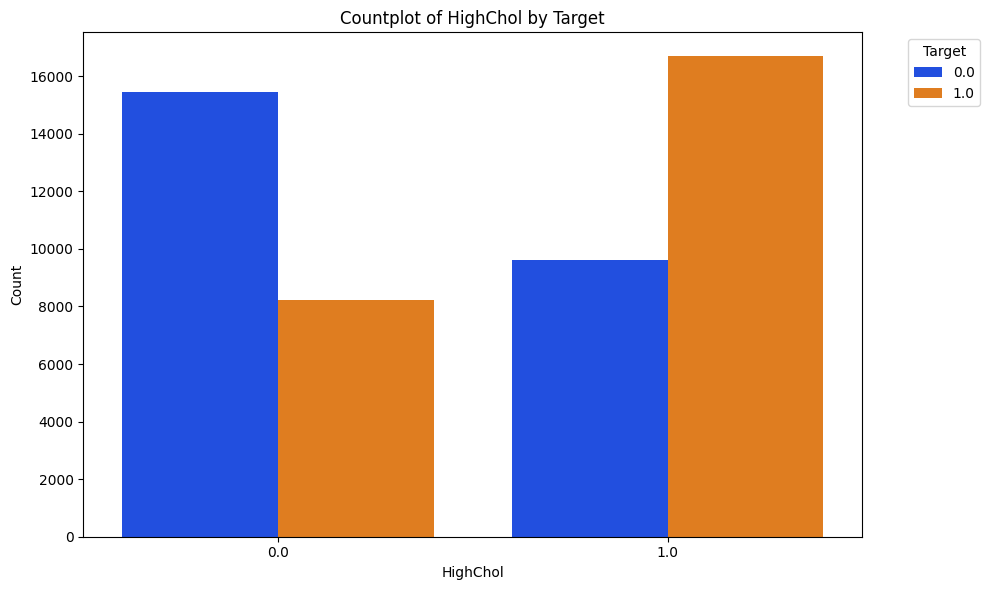

Generating countplot for: CholCheck


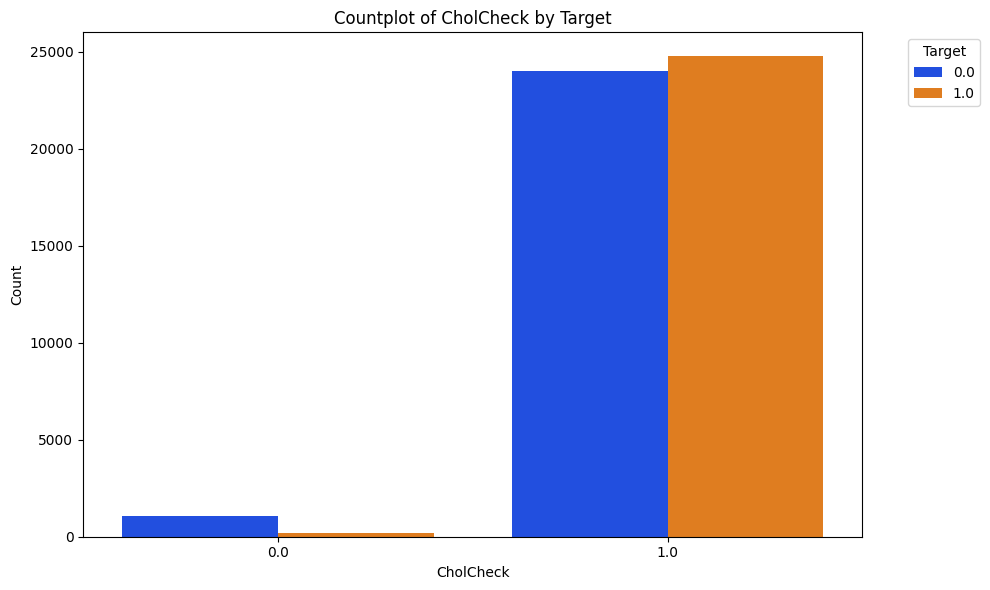

Generating countplot for: Smoker


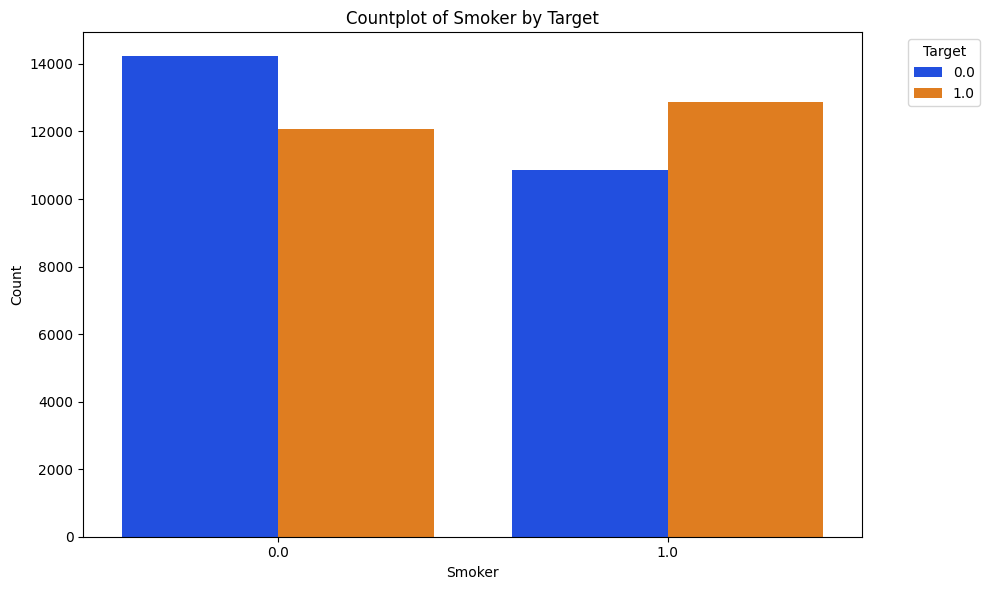

Generating countplot for: Stroke


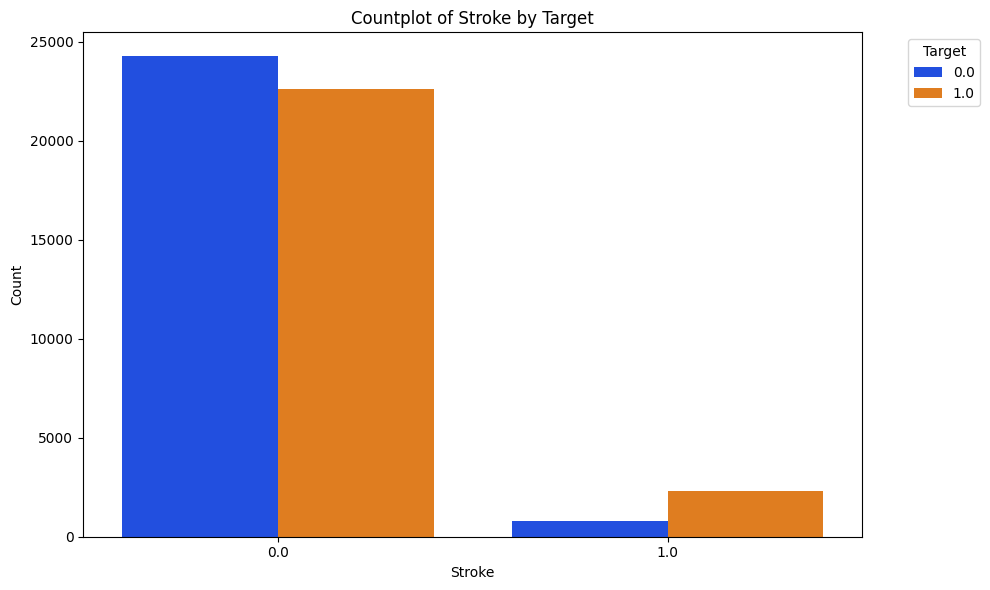

Generating countplot for: HeartDiseaseorAttack


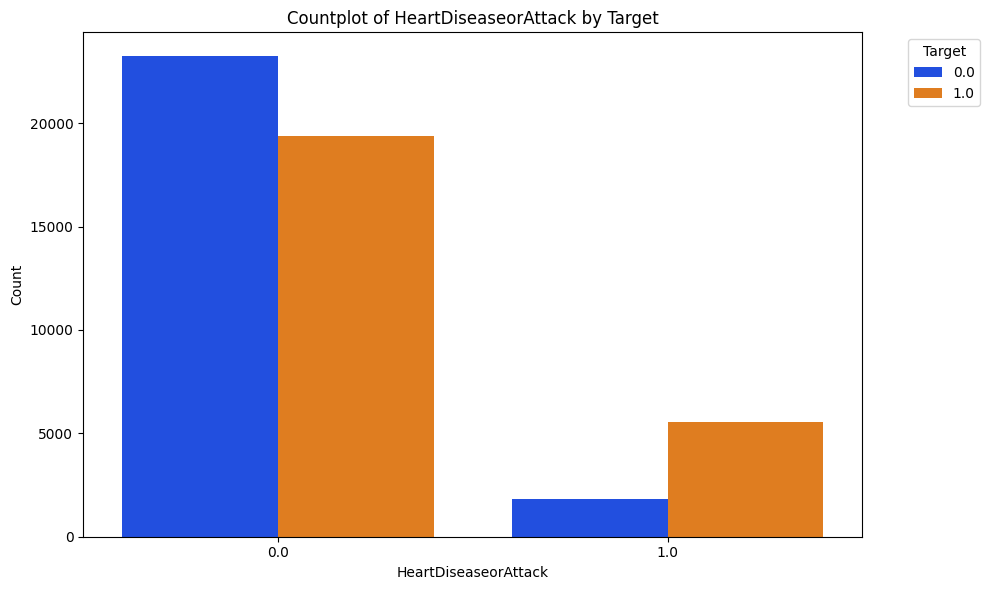

Generating countplot for: PhysActivity


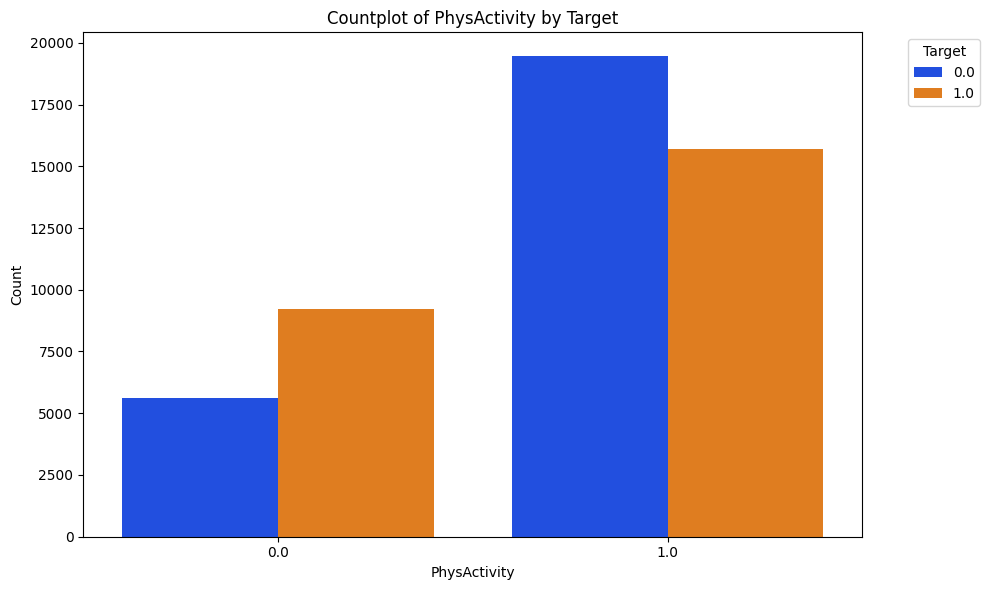

Generating countplot for: Fruits


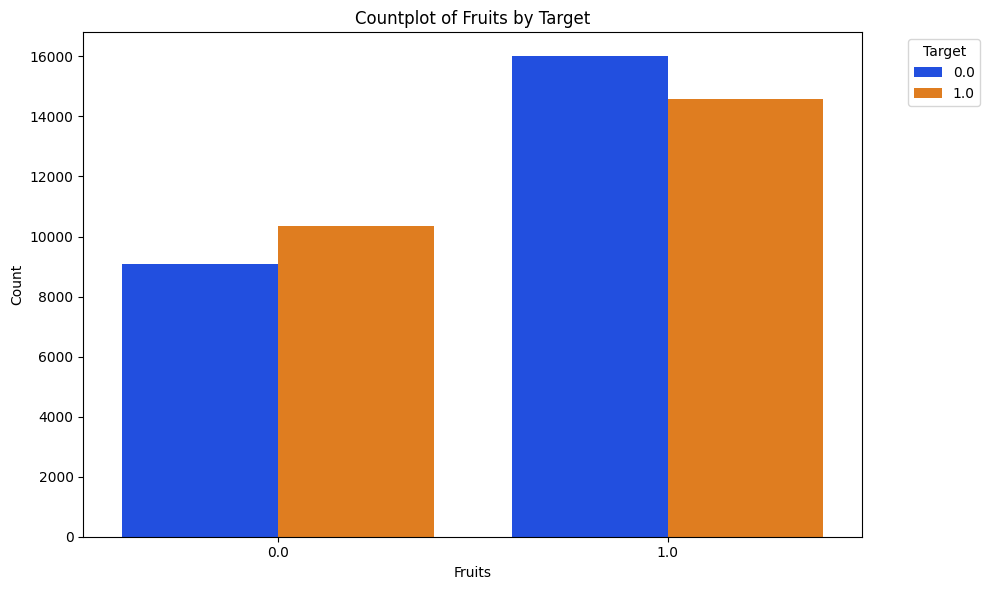

Generating countplot for: Veggies


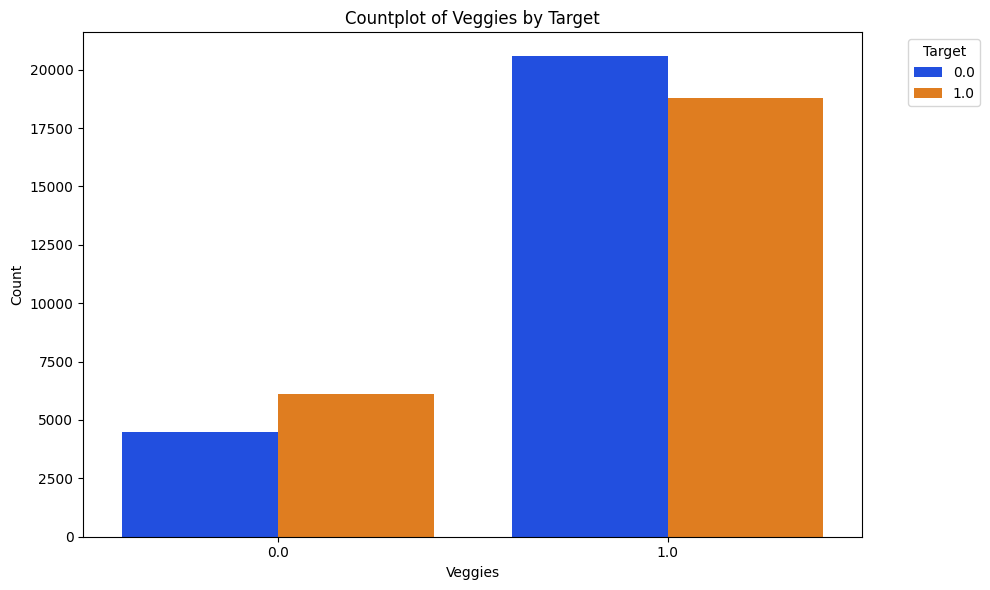

Generating countplot for: HvyAlcoholConsump


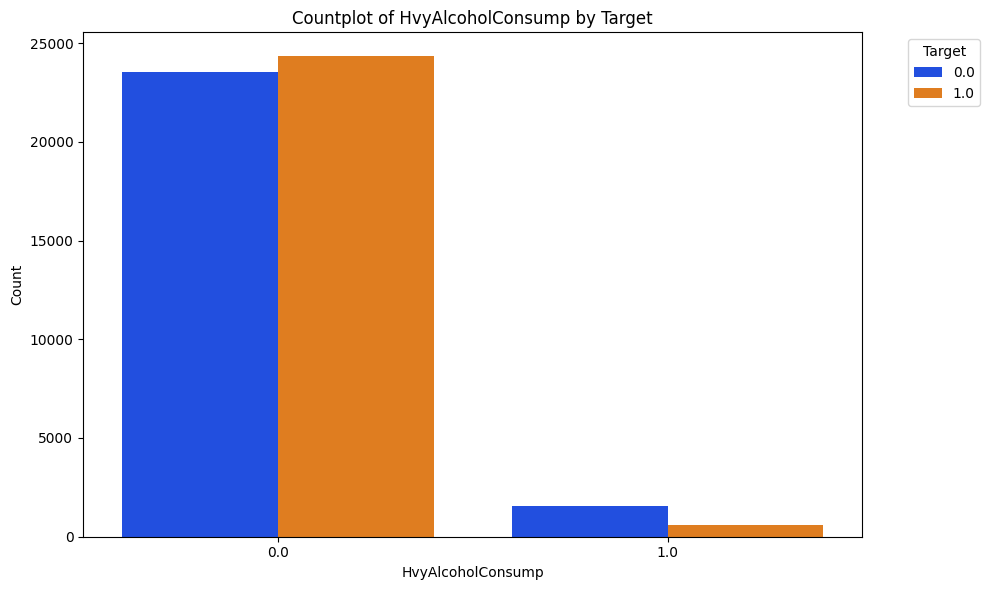

Generating countplot for: AnyHealthcare


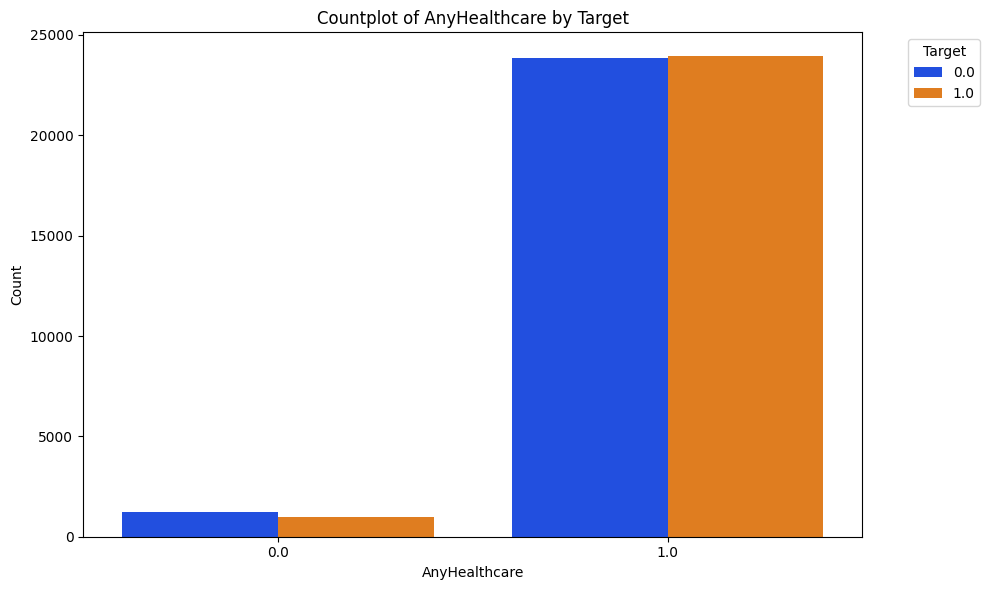

Generating countplot for: NoDocbcCost


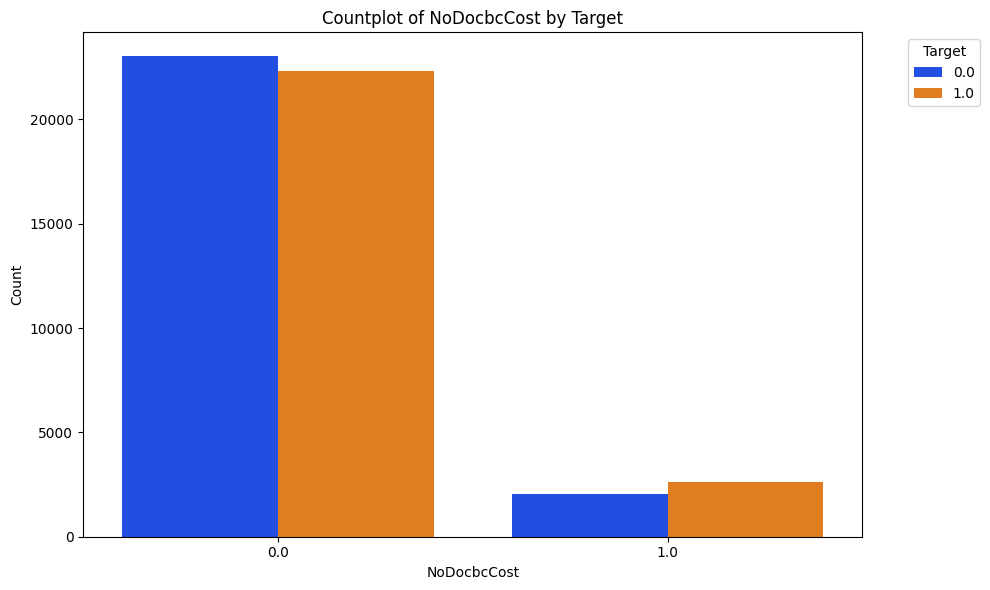

Generating countplot for: GenHlth


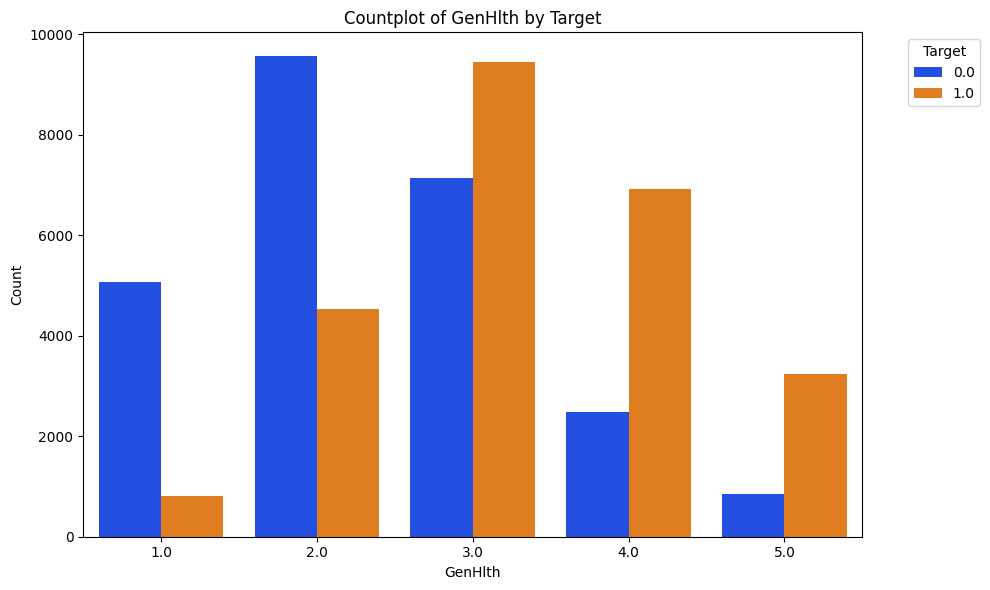

Generating countplot for: DiffWalk


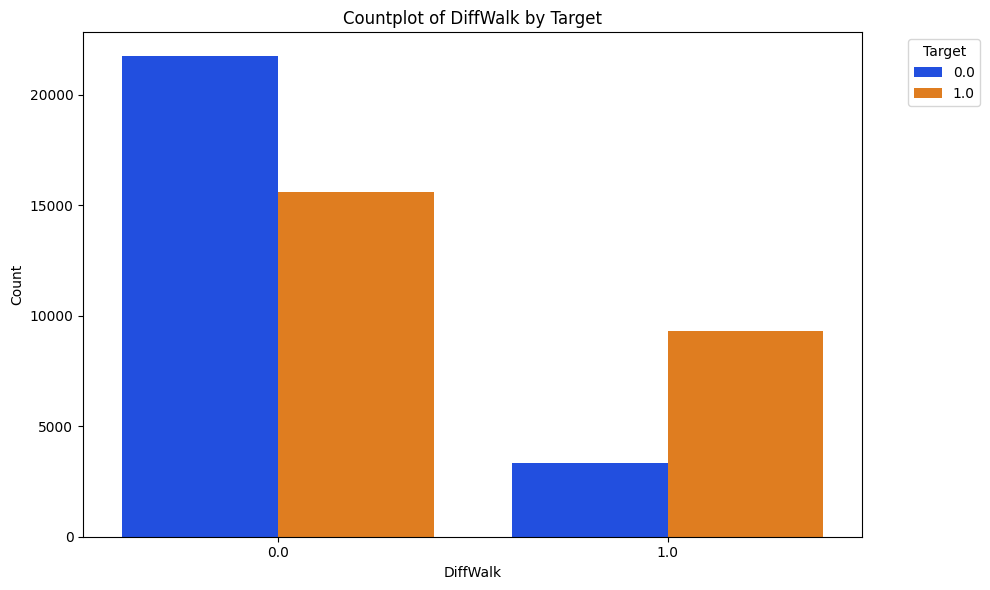

Generating countplot for: Sex


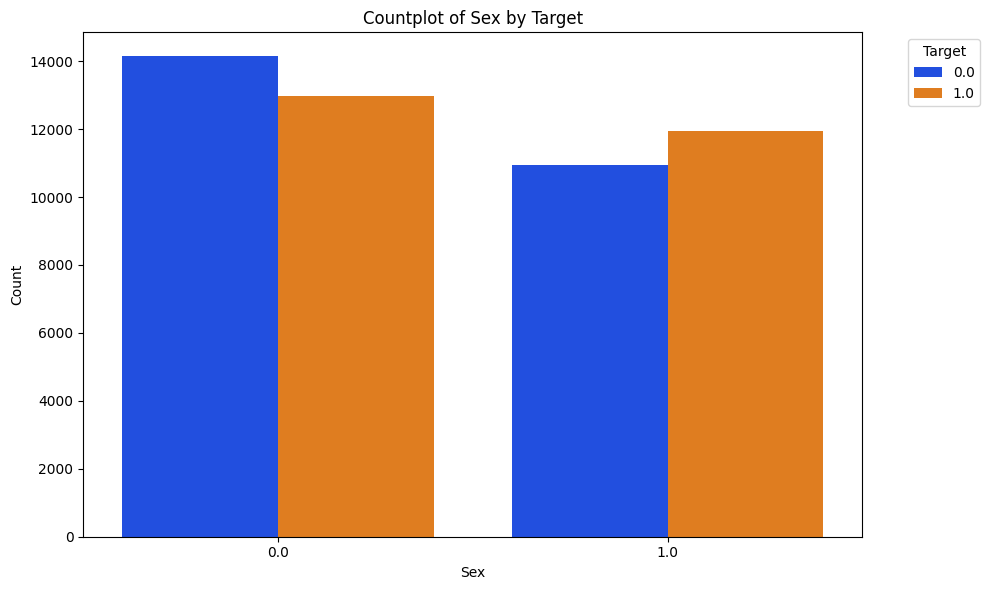

Generating countplot for: Education


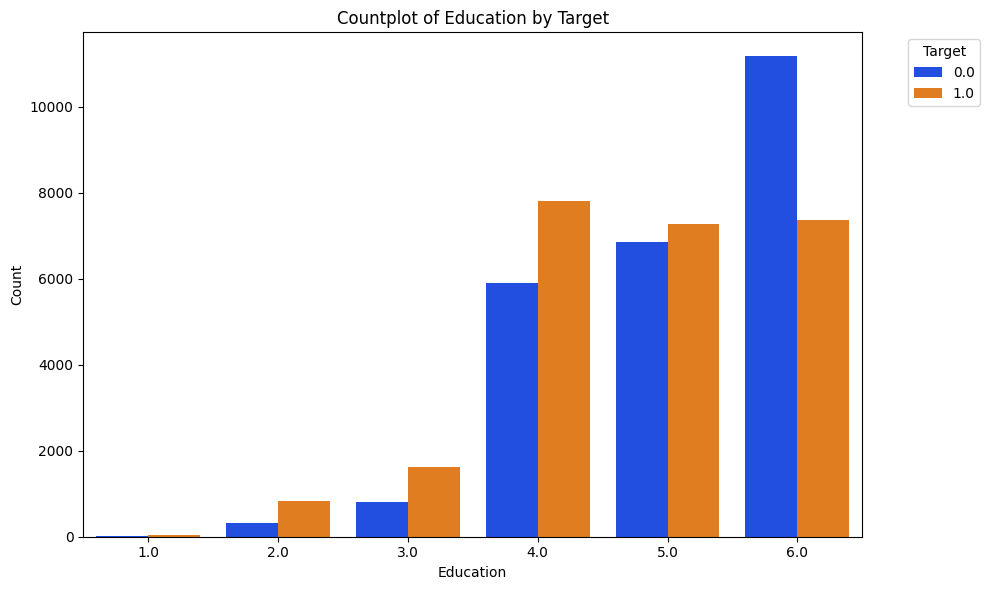

Generating countplot for: Income


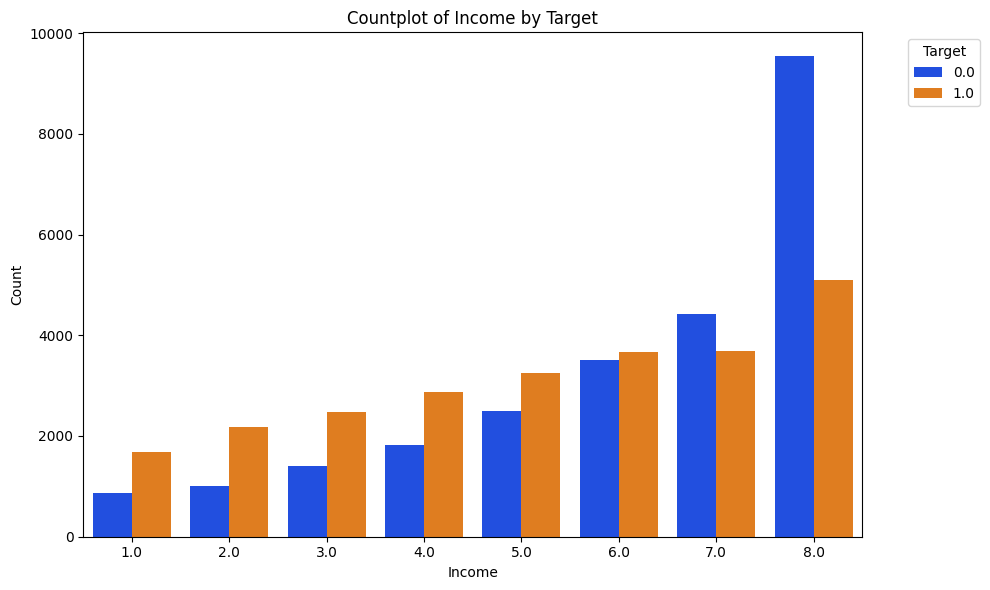

In [307]:
# Graphical representation of categories using category columns.

# For each category
for col in cat_cols:
    print(f"Generating countplot for: {col}")

    # Figure size 10 x 6
    plt.figure(figsize=(10, 6))

    # Gerenrate graph(s) using 'bright' color
    sns.countplot(data=df, x=col, hue='Has_diabetes', palette='bright')
    
    # Set plot title and labels
    plt.title(f'Countplot of {col} by Target')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Adjustment to the legend(key)
    plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Display the plot using tight layout to adjust padding
    plt.tight_layout()  
    plt.show()

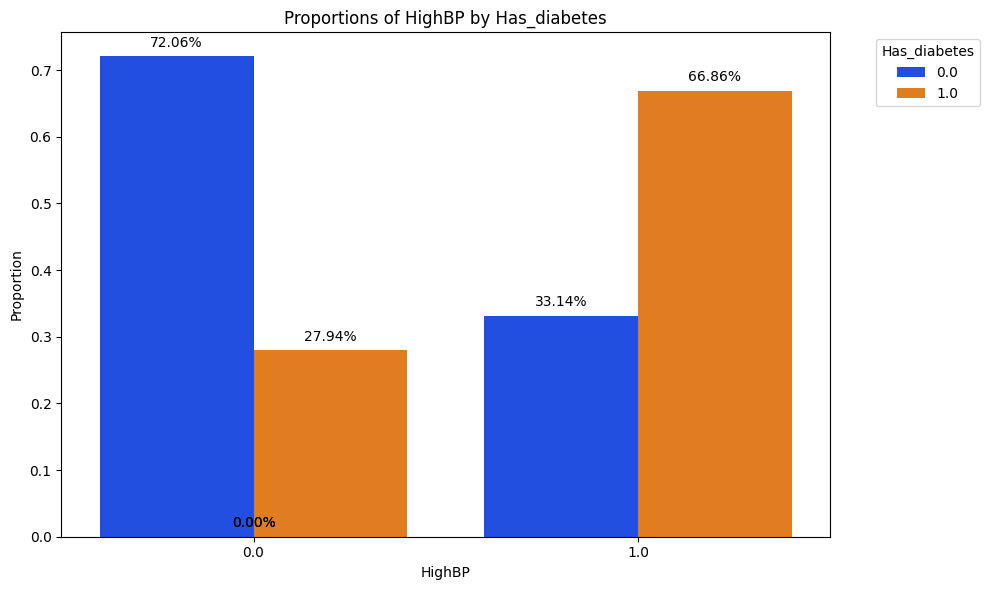

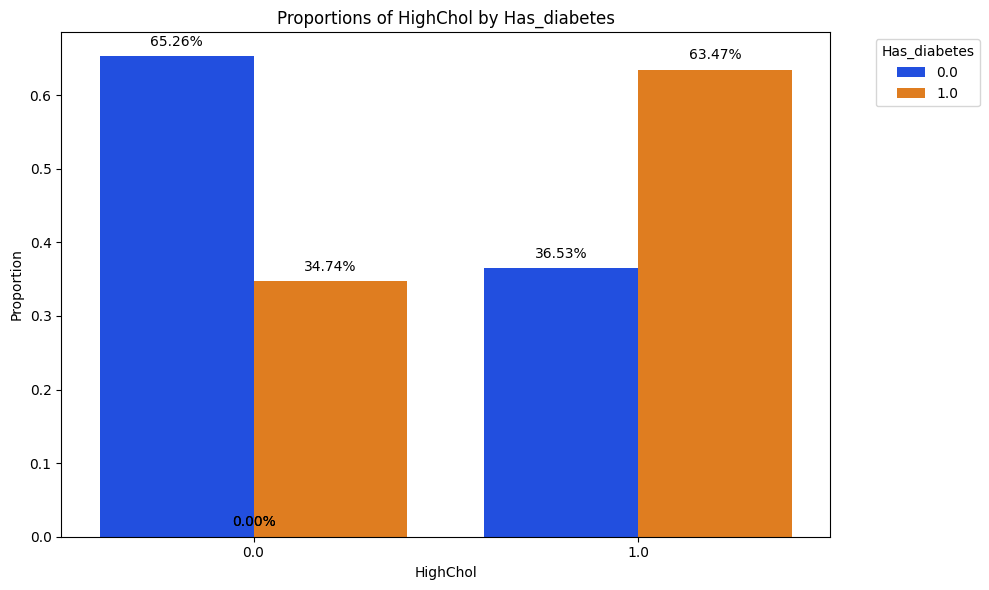

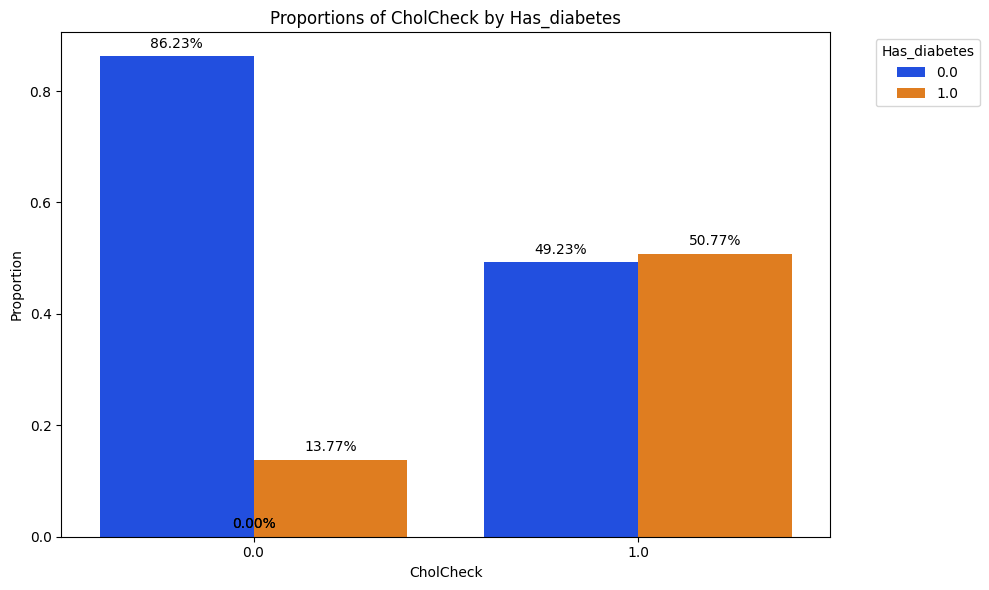

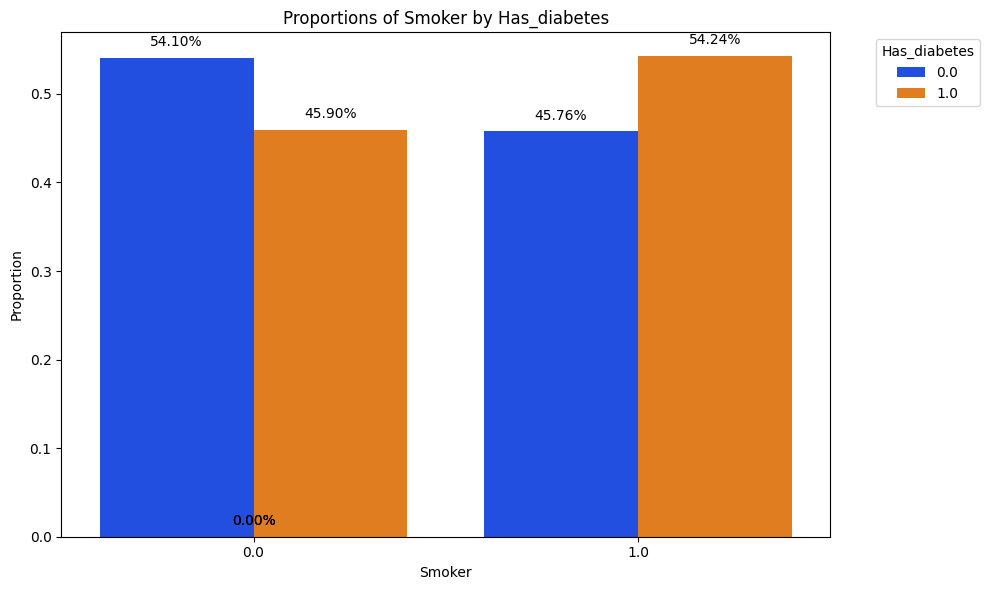

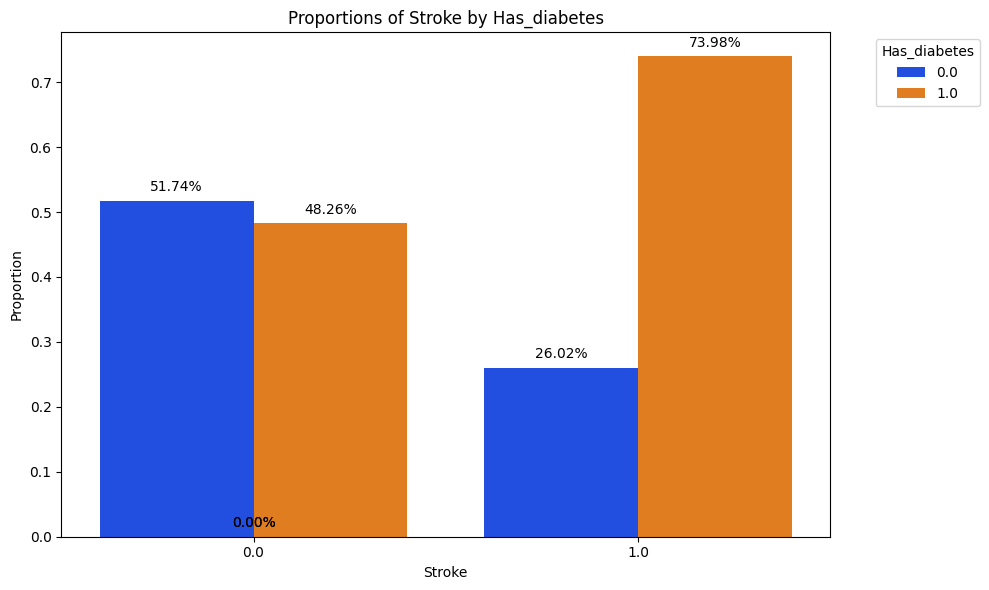

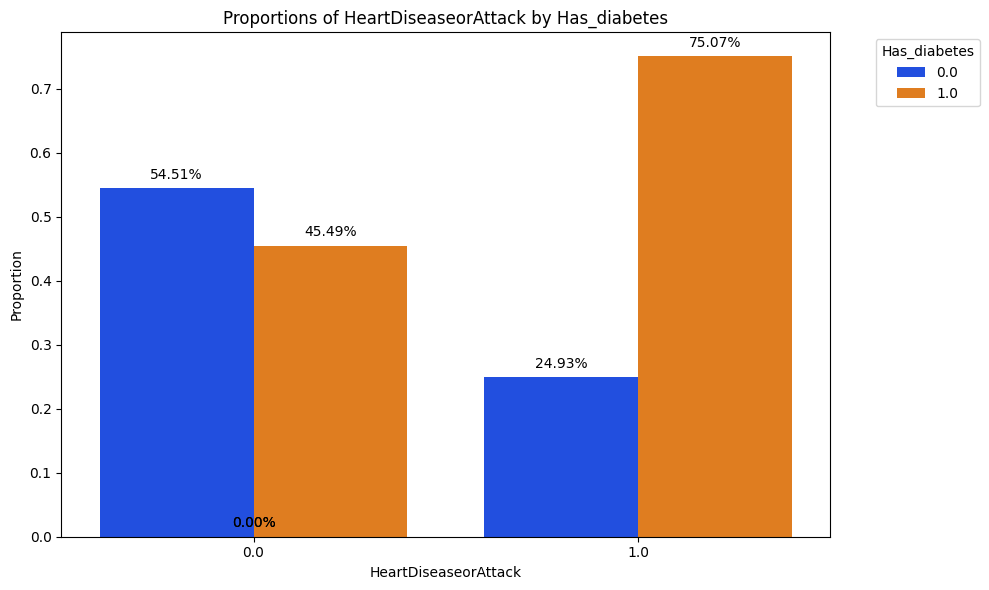

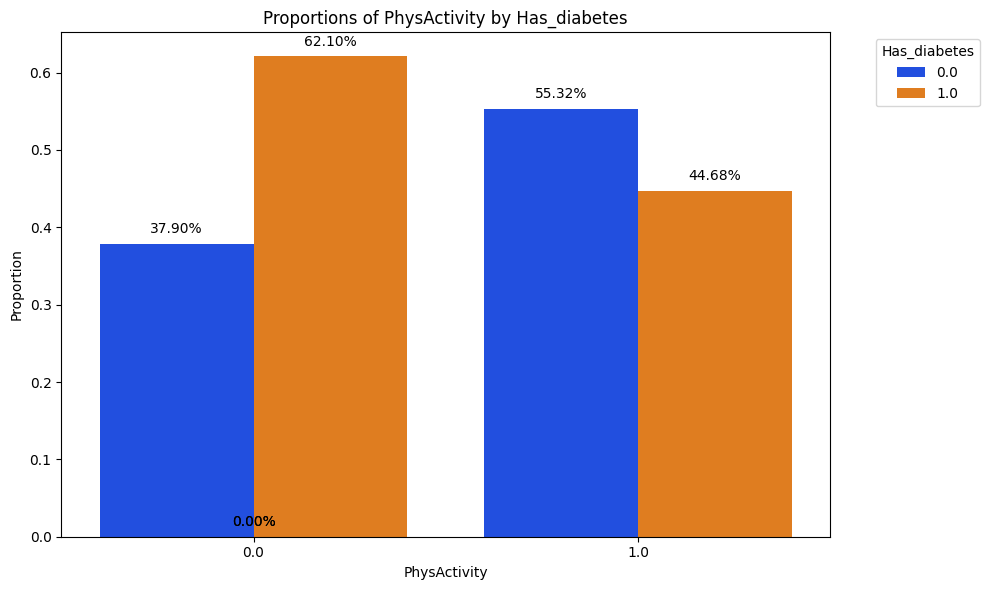

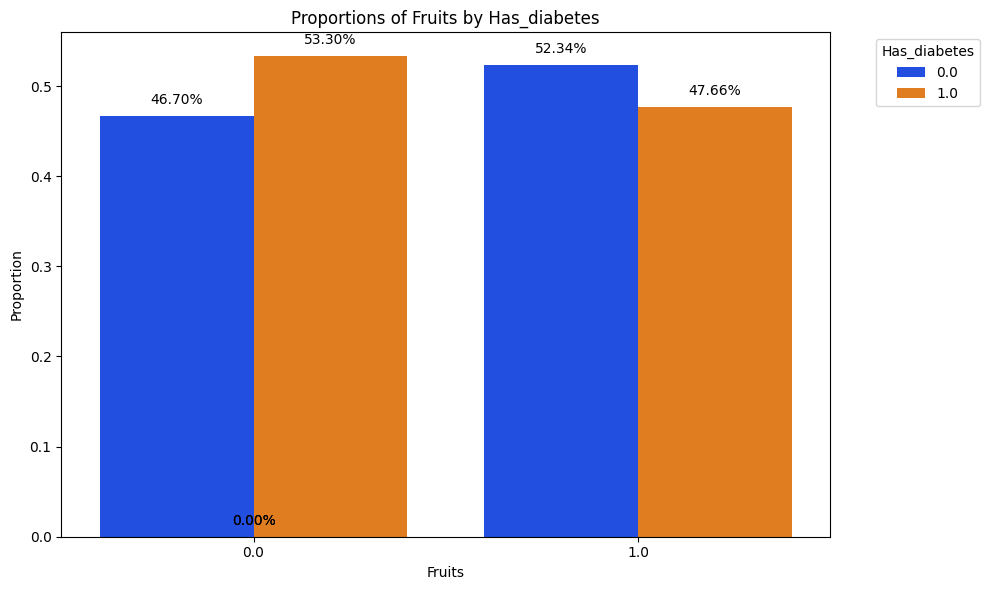

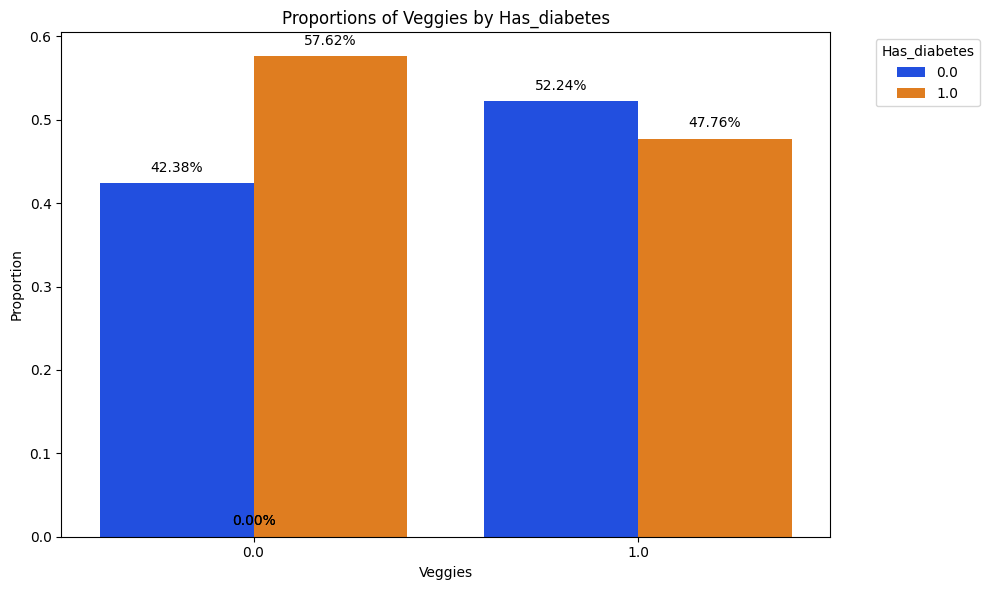

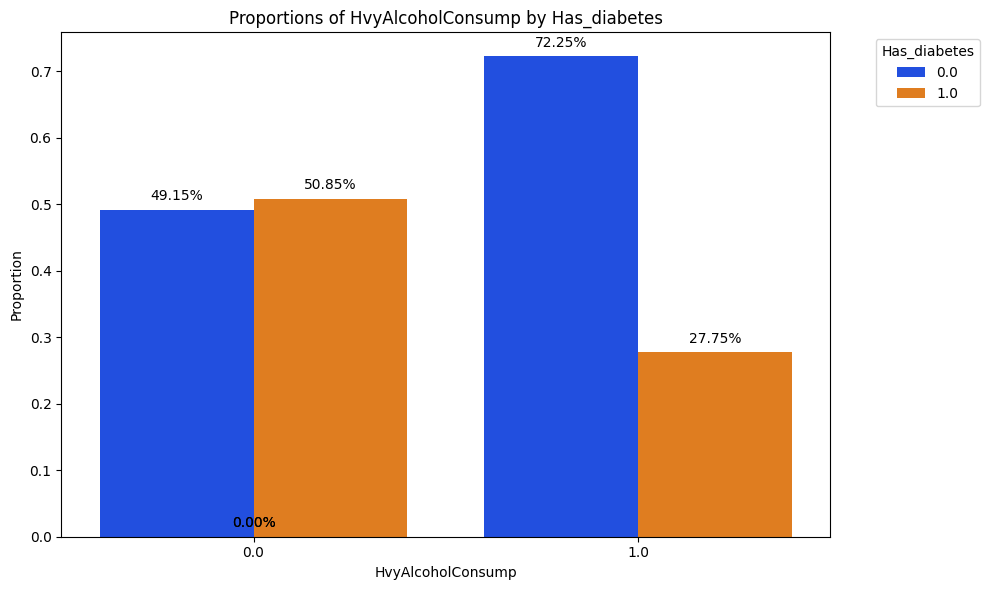

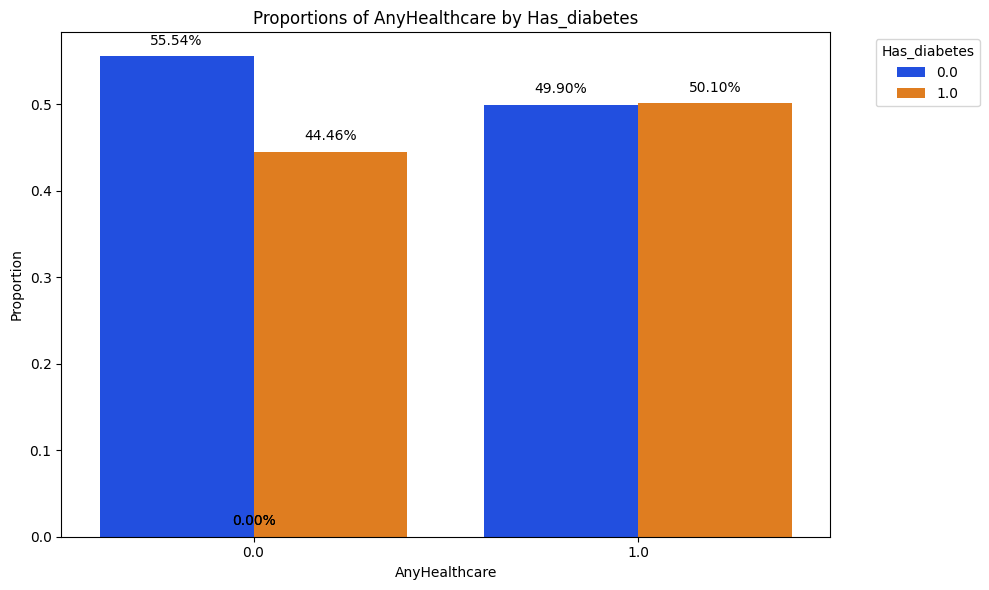

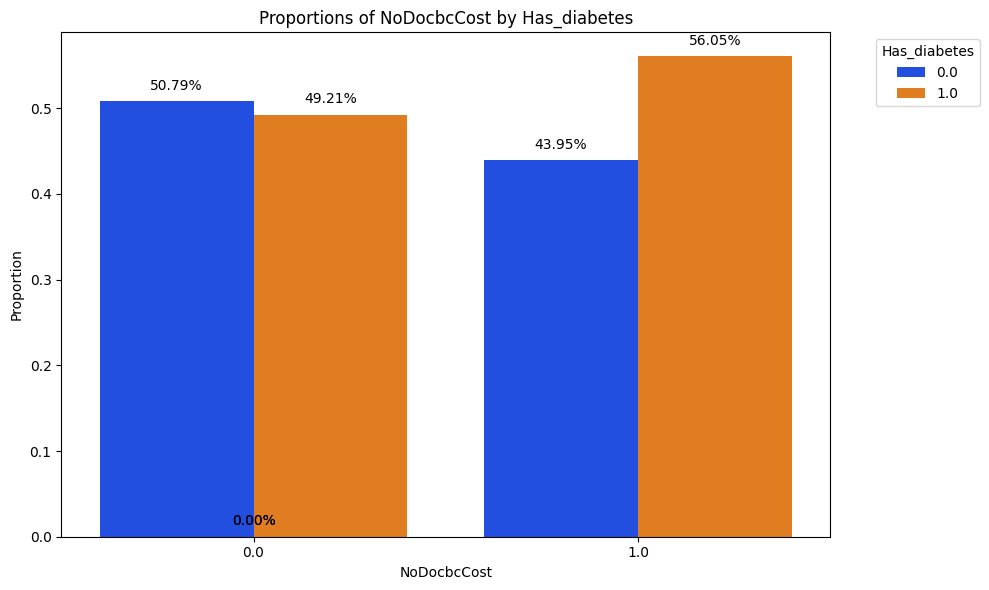

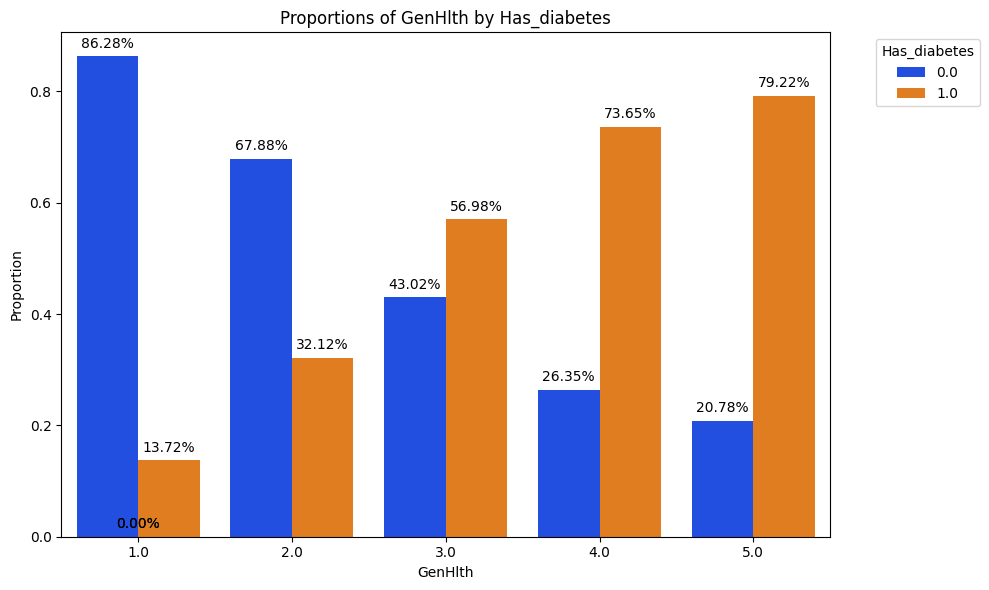

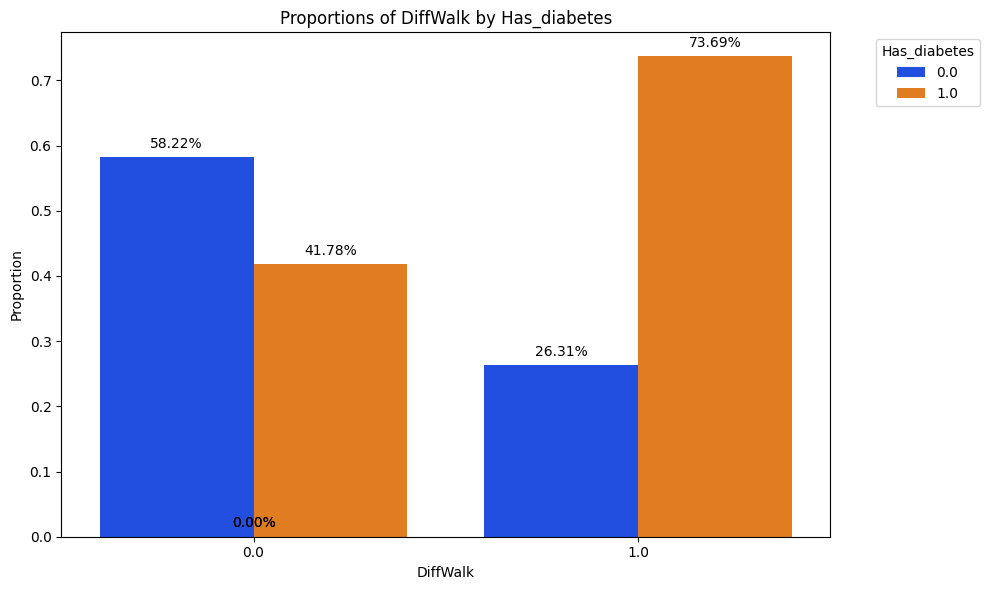

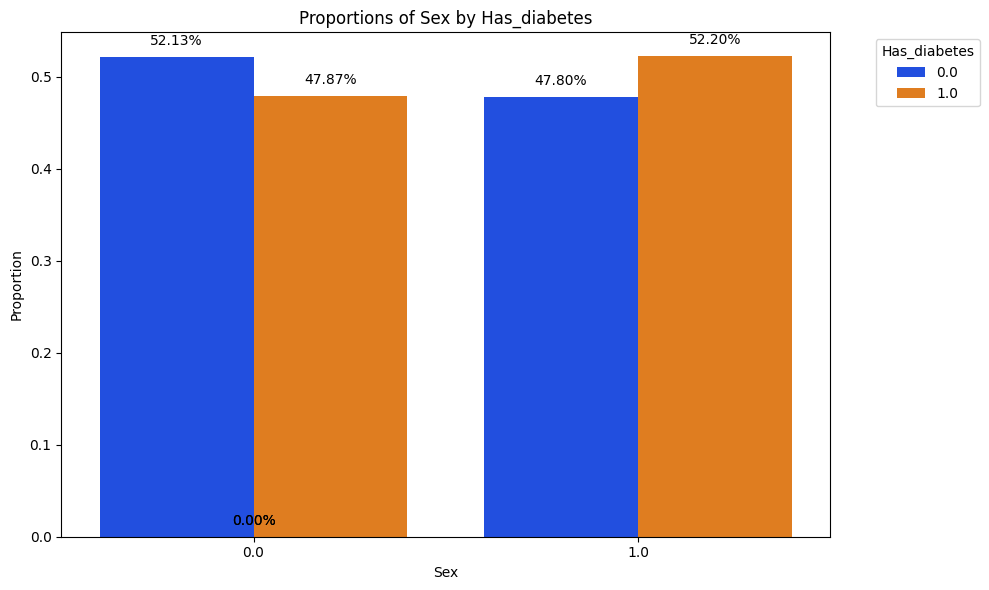

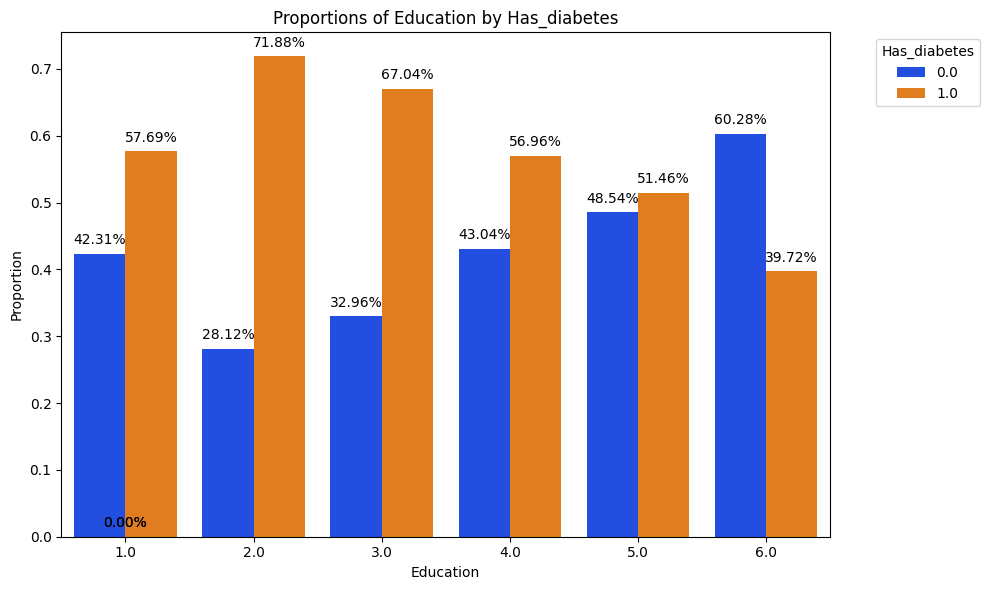

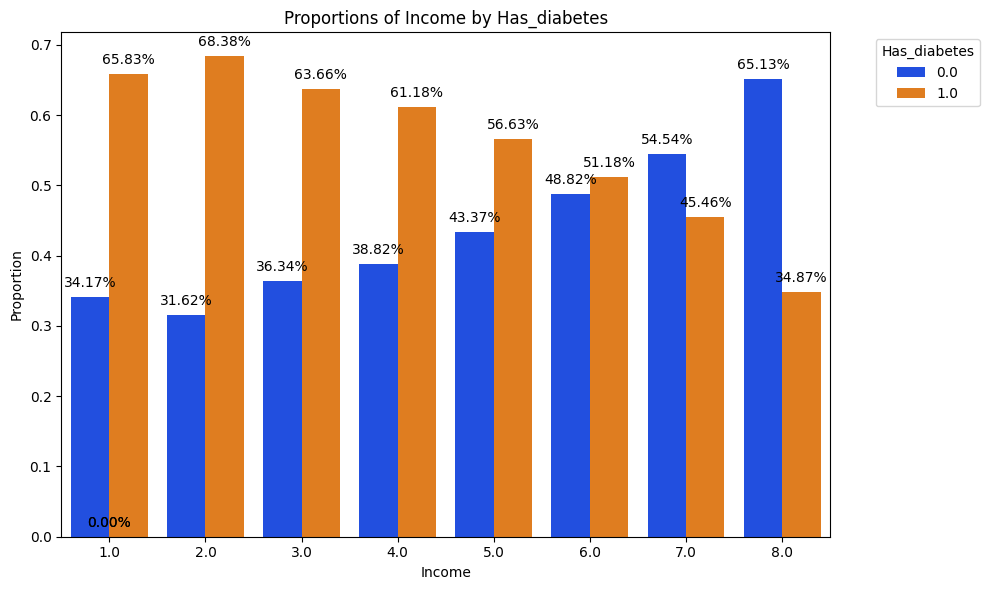

In [308]:
# Function to plot proportions of categorical variables
def plot_proportions(data, x, hue):
    # Calculate proportions
    counts = data.groupby([x, hue]).size().reset_index(name='count')
    total_counts = data.groupby(x).size().reset_index(name='total')
    
    # Merge counts with total_counts to calculate proportions
    merged = pd.merge(counts, total_counts, on=x)

    # Proportion is calculated within a group having the same target variable label (0 or 1)
    merged['proportion'] = merged['count'] / merged['total']

    # Plot proportions
    plt.figure(figsize=(10, 6))
    
    sns.barplot(data=merged, x=x, y='proportion', hue=hue, palette='bright')
    
    # Annotate with proportion values using the current axes
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height + 0.01, f'{height:.2%}', 
                 ha='center', va='bottom')

    # Proportions of catagories that has diabetes
    plt.title(f'Proportions of {x} by {hue}')
    plt.xlabel(x)
    plt.ylabel('Proportion')

    # Adjustment to the legend(key)
    plt.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Display the plot using tight layout to adjust padding
    plt.tight_layout()
    plt.show()

# Apply function to each categorical column
for col in cat_cols:
    plot_proportions(df, col, 'Has_diabetes')

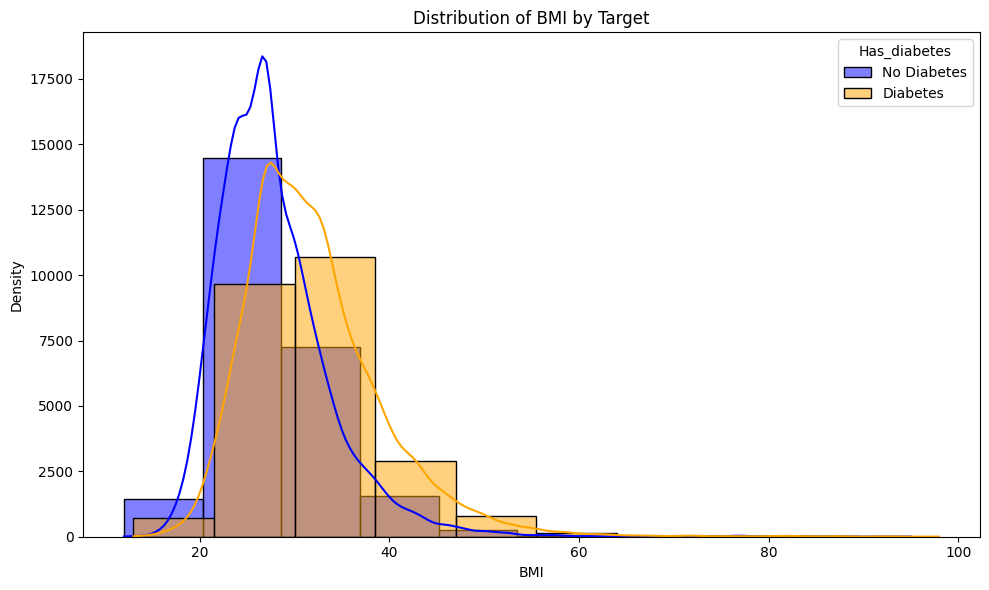

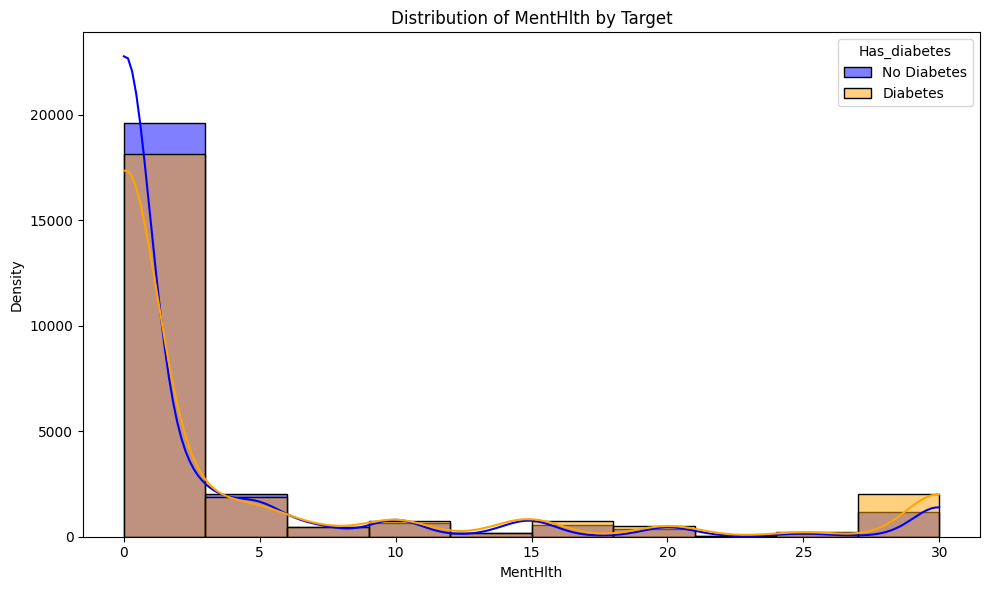

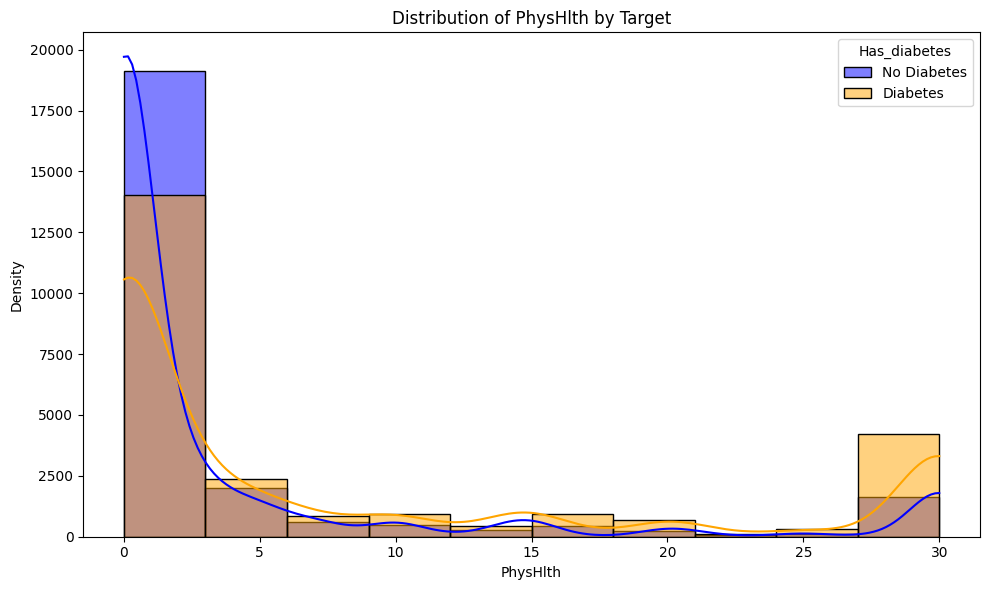

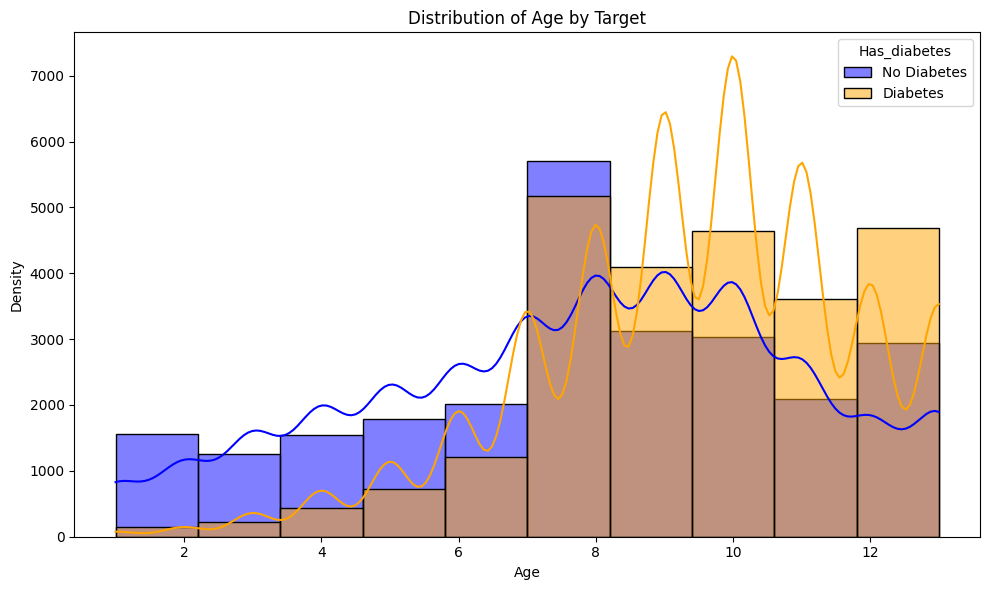

In [309]:
# Loop to create and display distribution plots
for col in num_cols:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram with KDE for 'Has_diabetes' = 0
    sns.histplot(data=df[df['Has_diabetes'] == 0], x=col, kde=True, color='blue', label='No Diabetes', bins=10)
    
    # Plot histogram with KDE for 'Has_diabetes' = 1
    sns.histplot(data=df[df['Has_diabetes'] == 1], x=col, kde=True, color='orange', label='Diabetes', bins=10)
    
    # Set plot title and labels
    plt.title(f'Distribution of {col} by Target')
    plt.xlabel(col)
    plt.ylabel('Density')
    
    # Display the legend
    plt.legend(title='Has_diabetes', loc='upper right')
    
    # Display the plot
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()



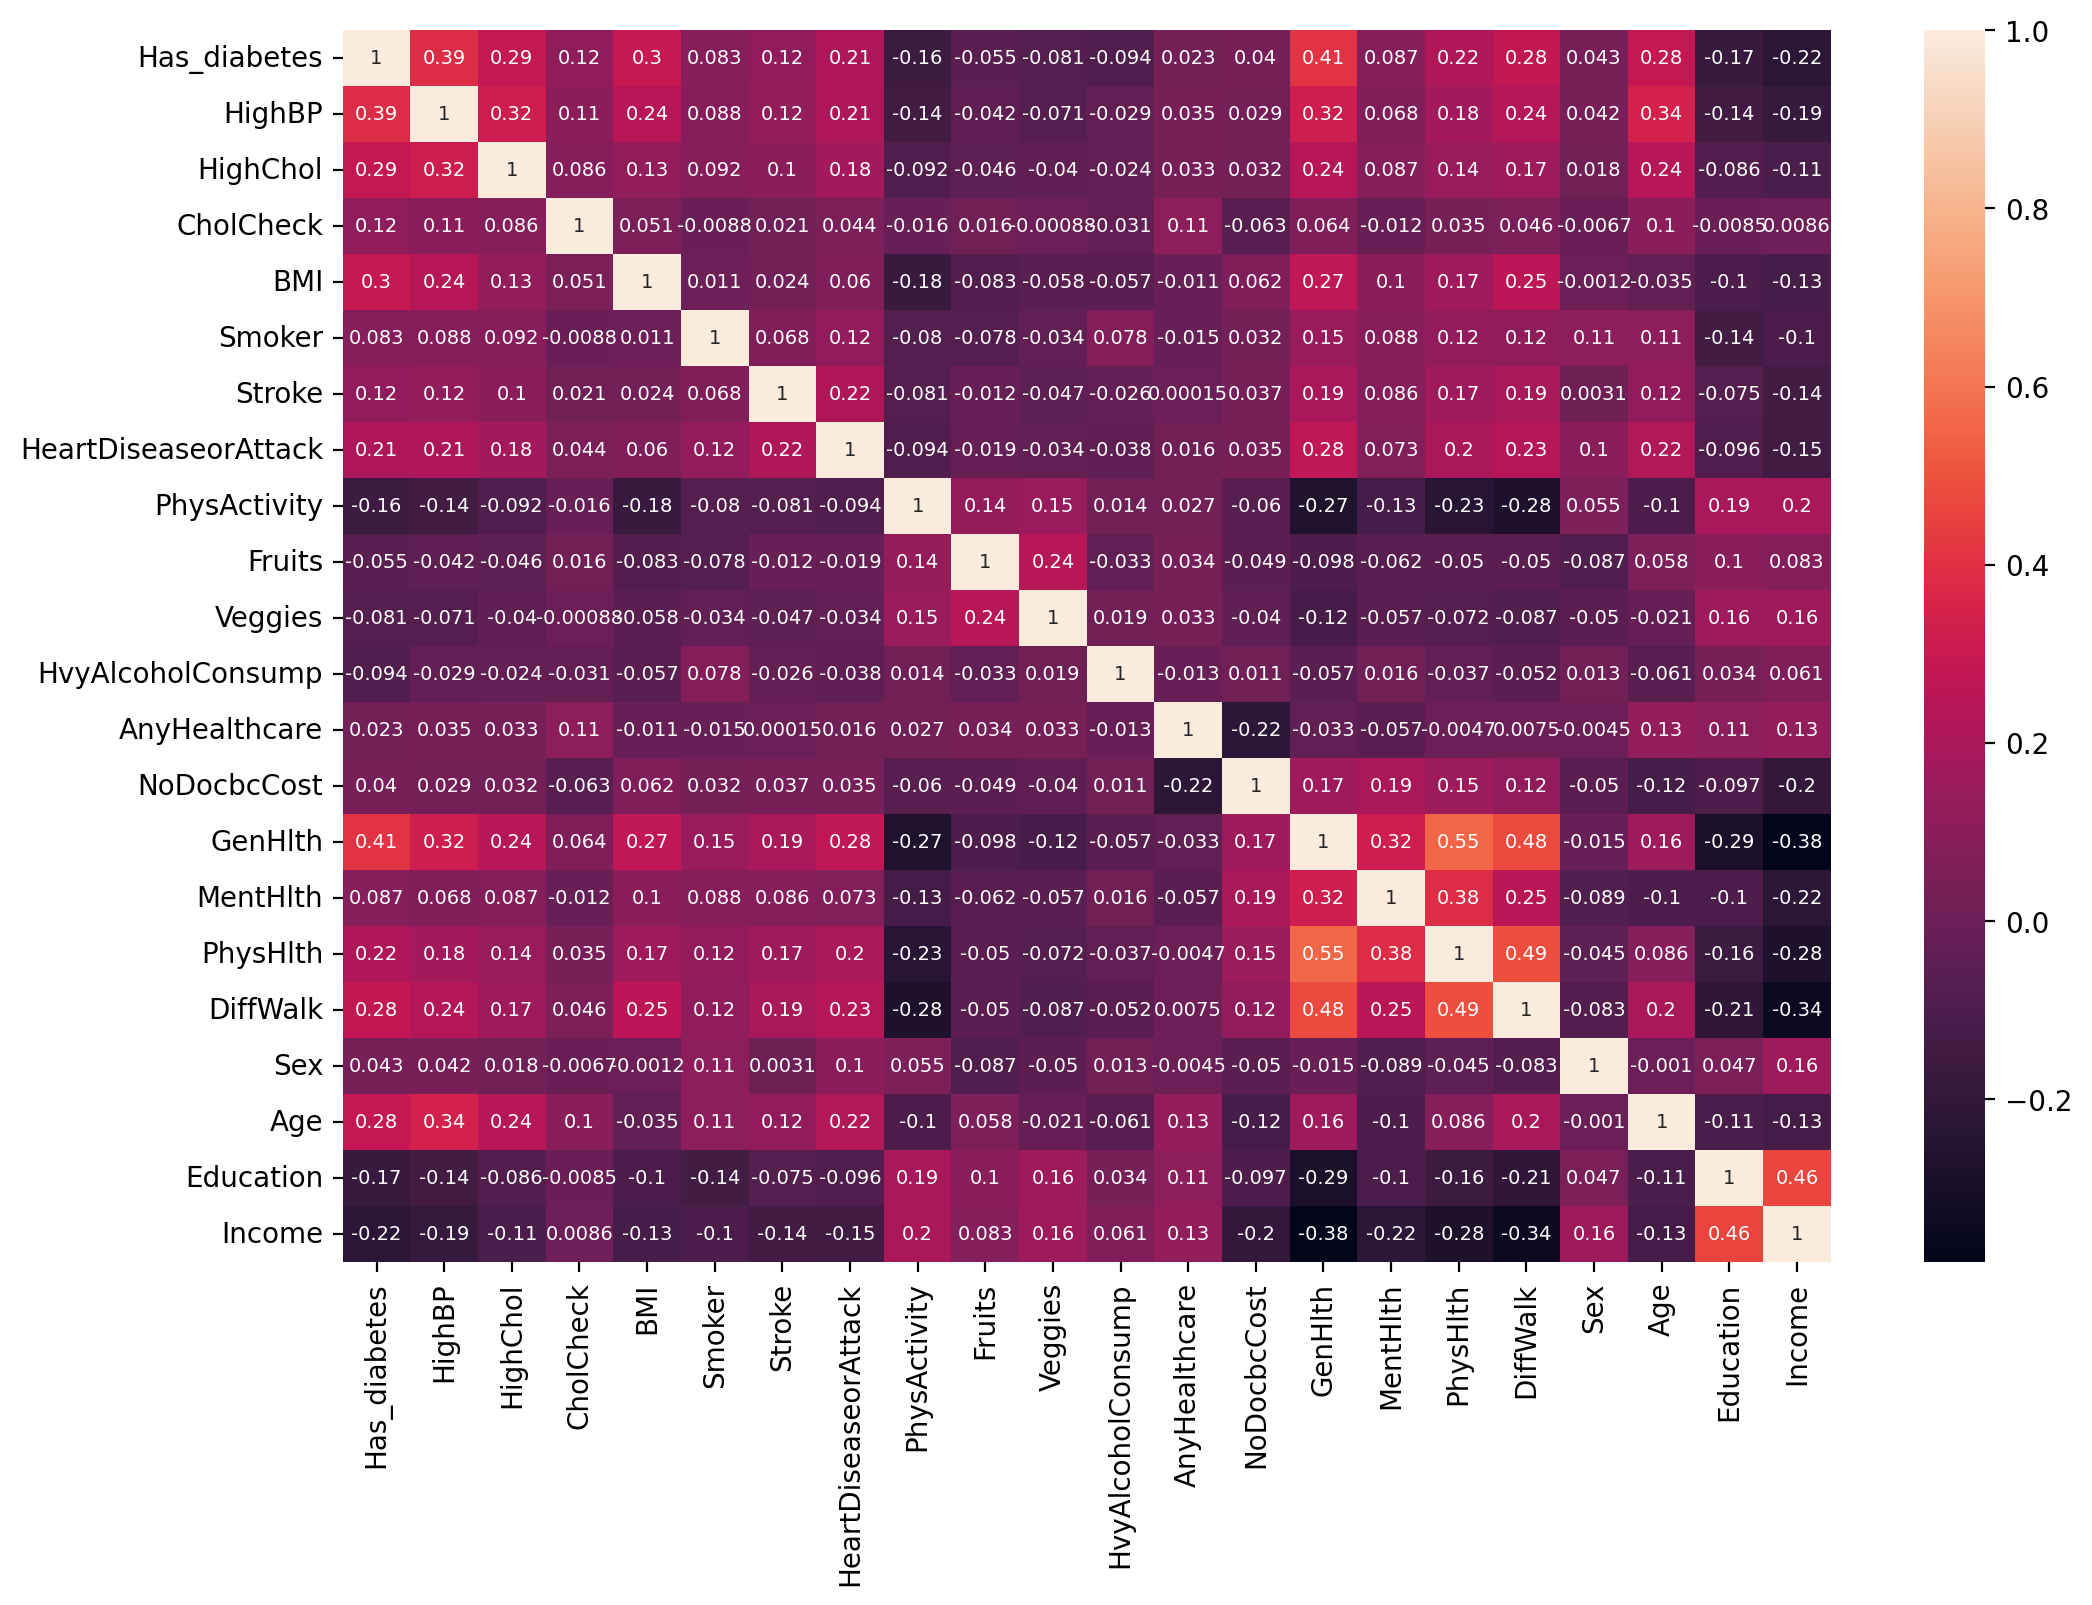

In [310]:
# Heatmap
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(df.corr(), annot=True, annot_kws={"size" : 7});

In [311]:
# Features and target
X = df.drop(columns=['Has_diabetes'])  # 21 features - drops 'Has_diabetes'
y = df['Has_diabetes']  # Target variable

In [312]:
# Handling missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
df[df.columns] = imputer.fit_transform(df)

In [313]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [314]:
# Standardizing the features using imputer
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier

In [315]:
# Parameter Grid
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

In [316]:
# Model using a random state
dt = DecisionTreeClassifier(random_state=42)

In [317]:
# Grid Search with "5-fold cross-validation"
grid_dt = GridSearchCV(dt, dt_param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1, verbose=2)
grid_dt.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_le

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 10, 20]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [318]:
# Best Decision Tree model and its parameters
best_dt_model = grid_dt.best_estimator_
best_dt_model.fit(X_train_scaled, y_train)

# Best Params and Model Accuracy
print(f"Best Decision Tree parameters: {grid_dt.best_params_}")
print(f"Best Decision Tree Cross-Validation Accuracy: {grid_dt.best_score_:.4f}")

Best Decision Tree parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Decision Tree Cross-Validation Accuracy: 0.7329


In [319]:
# Cross-validation mean and standard deviation for Decision Tree
dt_cv_results = cross_val_score(best_dt_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Mean and Standard deviation
print(f"Decision Tree Mean Accuracy: {dt_cv_results.mean():.4f}")
print(f"Decision Tree Accuracy Standard Deviation: {dt_cv_results.std():.4f}")

Decision Tree Mean Accuracy: 0.7329
Decision Tree Accuracy Standard Deviation: 0.0057


In [320]:
# Evaluate the best Decision Tree model on the test set
y_pred_dt = best_dt_model.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Test Accuracy: {accuracy_dt:.4f}")

Decision Tree Test Accuracy: 0.7357


In [321]:
# Classification Report and Confusion Matrix for Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.70      0.73      5015
         1.0       0.72      0.77      0.74      4985

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



In [322]:
# Save the best DecisionTree model to a pickle file
with open('best_dt_model.pkl', 'wb') as file:
    pickle.dump(best_dt_model, file)

In [348]:
# Evaluating dt the model using scaled test data
print("Evaluating model on test data...")
model_evaluate(best_dt_model,X_test_scaled,y_test)

Evaluating model on test data...
Evaluating model performance on test data
Accuracy: 0.7357

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.75      0.70      0.73      5015
         1.0       0.72      0.77      0.74      4985

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000




Decision Tree Confusion Matrix:


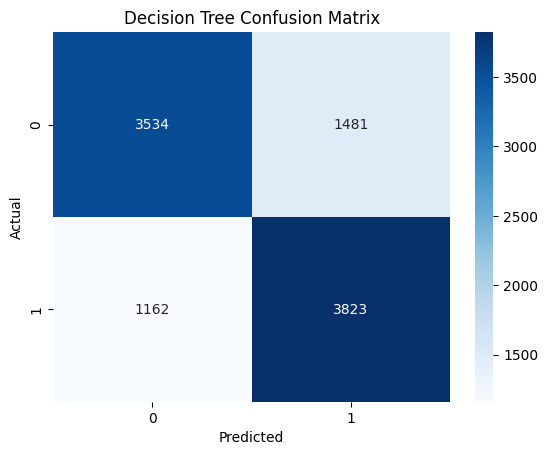

In [362]:
# Decision Tree Confusion Matrix
print("Decision Tree Confusion Matrix:")
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest Classifier

In [349]:
# Parameter grid for Random Forest
rf_param_grid = {
    'max_depth': [10, 20, 50],
    'n_estimators': [100, 200, 500],
    'criterion': ['gini','entropy'],
    'bootstrap': [True, False],
    'max_features': ['sqrt','log2'],
    'class_weight': ['balanced'],
    'n_jobs': [-1],
    'random_state': [42]
}

In [350]:
rf = RandomForestClassifier(random_state=42)

In [327]:

# Grid Search with 5-fold cross-validation
grid_rf = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1, verbose=2)
grid_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100, n_jobs=-1, random_state=42; total time=   1.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100, n_jobs=-1, random_state=42; total time=   1.4s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100, n_jobs=-1, random_state=42; total time=   1.4s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100, n_jobs=-1, random_state=42; total time=   1.4s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100, n_jobs=-1, random_state=42; total time=   1.5s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=200, n_jobs=-1, ra

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=log2, n_estimators=200, n_jobs=-1, random_state=42; total time=   4.5s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=log2, n_estimators=200, n_jobs=-1, random_state=42; total time=   4.7s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, n_estimators=100, n_jobs=-1, random_state=42; total time=   2.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, n_estimators=100, n_jobs=-1, random_state=42; total time=   2.5s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, n_estimators=100, n_jobs=-1, random_state=42; total time=   2.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, n_estimators=100, n_jobs=-1, random_state=42; total time=   2.6s
[CV] END bootstrap=True, cla

/opt/homebrew/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 50],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 500], 'n_jobs': [-1],
                         'random_state': [42]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [352]:
# Best Random Forest model and its parameters
best_rf_model = grid_rf.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

# Best Params and Model Accuracy
print(f"Best Random Forest parameters: {grid_rf.best_params_}")
print(f"Best Random Forest Cross-Validation Accuracy: {grid_rf.best_score_:.4f}")

Best Random Forest parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
Best Random Forest Cross-Validation Accuracy: 0.7537


In [353]:
# Cross-validation mean and standard deviation for Random Forest
rf_cv_results = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Mean and Standard deviation
print(f"Random Forest Mean Accuracy: {rf_cv_results.mean():.4f}")
print(f"Random Forest Accuracy Standard Deviation: {rf_cv_results.std():.4f}")

Random Forest Mean Accuracy: 0.7537
Random Forest Accuracy Standard Deviation: 0.0075


In [355]:
# Evaluate the best RandomForest model on the test set
y_pred_rf = best_rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Test Accuracy: {accuracy_rf:.4f}")

Random Forest Test Accuracy: 0.7524


In [357]:
# Save the best RandomForest model to a pickle file
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

In [358]:
# Evaluating rf the model using scaled test data
print("Evaluating model on test data...")
model_evaluate(best_rf_model,X_test_scaled,y_test)

Evaluating model on test data...
Evaluating model performance on test data
Accuracy: 0.7524

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      5015
         1.0       0.73      0.80      0.76      4985

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000




Random Forest Confusion Matrix:


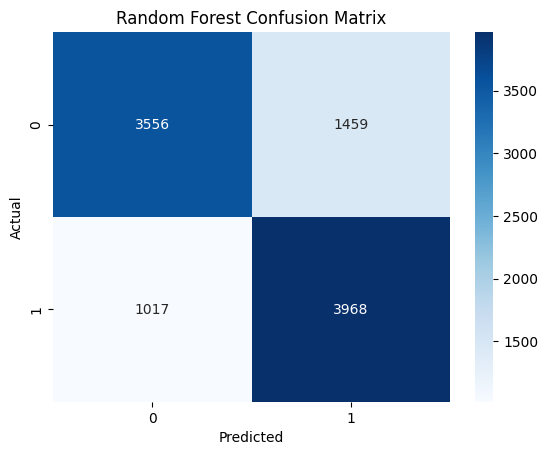

In [363]:
# Confusion Martix for Random Forest
print("Random Forest Confusion Matrix:")

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

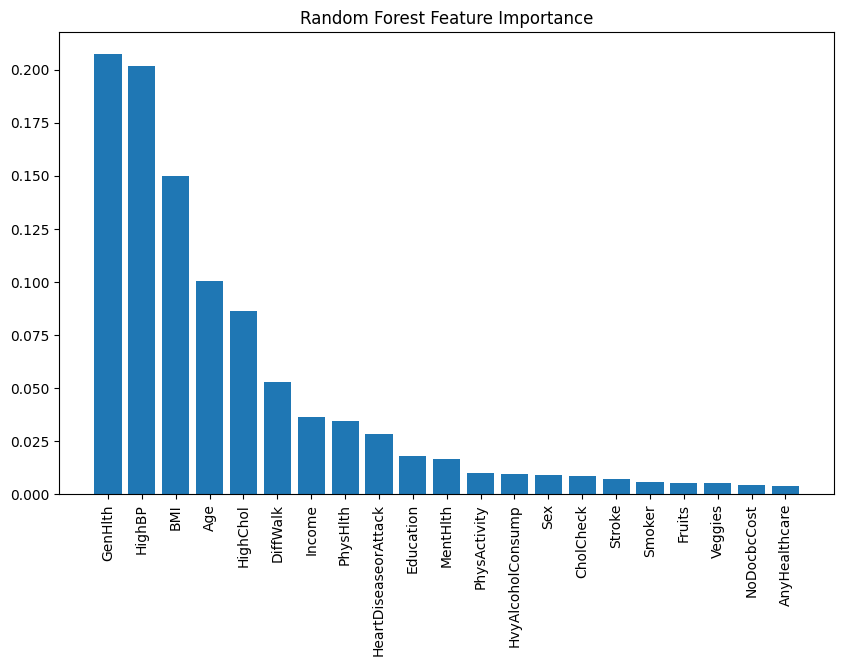

In [364]:
# Feature Importance for Random Forest
feature_importances_rf = best_rf_model.feature_importances_
sorted_idx_rf = np.argsort(feature_importances_rf)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances_rf[sorted_idx_rf], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[sorted_idx_rf], rotation=90)
plt.title('Random Forest Feature Importance')
plt.show()